# Лабораторная работа "Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных."
## Цель работы

Изучение способов предварительной обработки данных для дальнейшего формирования моделей.

## Задание
1. Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
2. Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
* обработку пропусков в данных;
* кодирование категориальных признаков;
* масштабирование данных.

### В чем состоит проблема?

- Если в данных есть пропуски, то большинство алгоритмов машинного обучения не будут с ними работать. Даже корреляционная матрица не будет строиться корректно.
- Большинство алгоритмов машинного обучения требуют явного перекодирования категориальных признаков в числовые. Даже если алгоритм не требует этого явно, такое перекодирование возможно стоит попробовать, чтобы повысить качество модели.
- Большинство алгоритмов показывает лучшее качество на отмасштабированных признаках, в особенности алгоритмы, использующие методы градиентного спуска.


## Загрузка и первичный анализ данных

Используем данные [Video Game Sales](https://www.kaggle.com/gregorut/videogamesales/downloads/videogamesales.zip/2)

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [0]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [0]:
data = pd.read_csv('/gdrive/My Drive/Colab Notebooks/ММО/lab3/data/vgsales.csv', sep=",")

In [0]:
# размер набора данных
data.shape

(16598, 11)

In [0]:
# типы колонок
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [0]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [0]:
# Первые 5 строк датасета
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [0]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 16598


# 1. Обработка пропусков в данных

## 1.1. Простые стратегии - удаление или заполнение нулями

In [0]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((16598, 11), (16598, 9))

In [0]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((16598, 11), (16291, 11))

In [0]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [0]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## 1.2. "Внедрение значений" - импьютация (imputation)

### 1.2.1. Обработка пропусков в числовых данных

In [0]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Year. Тип данных float64. Количество пустых значений 271, 1.63%.


In [0]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Year
0,2006.0
1,1985.0
2,2008.0
3,2009.0
4,1996.0
5,1989.0
6,2006.0
7,2006.0
8,2009.0
9,1984.0


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


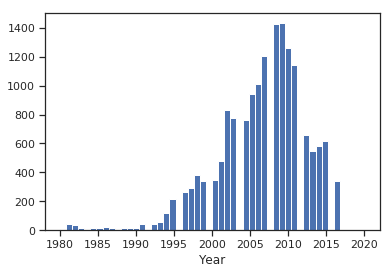

In [0]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [0]:
# Фильтр по пустым значениям поля MasVnrArea 
data[data['Year'].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.00,0.22,2.39
711,713,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
782,784,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11


In [0]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['Year'].isnull()].index
flt_index

Int64Index([  179,   377,   431,   470,   607,   624,   649,   652,   711,
              782,
            ...
            16191, 16194, 16198, 16229, 16246, 16307, 16327, 16366, 16427,
            16493],
           dtype='int64', length=271)

In [0]:
# Проверяем что выводятся нужные строки
data[data.index.isin(flt_index)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.00,0.22,2.39
711,713,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
782,784,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11


In [0]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['Year']

179     NaN
377     NaN
431     NaN
470     NaN
607     NaN
624     NaN
649     NaN
652     NaN
711     NaN
782     NaN
1126    NaN
1133    NaN
1303    NaN
1433    NaN
1498    NaN
1513    NaN
1585    NaN
1649    NaN
1697    NaN
1837    NaN
1990    NaN
2019    NaN
2086    NaN
2113    NaN
2114    NaN
2134    NaN
2145    NaN
2173    NaN
2286    NaN
2295    NaN
         ..
15197   NaN
15208   NaN
15261   NaN
15316   NaN
15476   NaN
15579   NaN
15606   NaN
15652   NaN
15697   NaN
15717   NaN
15739   NaN
15811   NaN
15865   NaN
15876   NaN
15878   NaN
15900   NaN
15915   NaN
16057   NaN
16058   NaN
16065   NaN
16191   NaN
16194   NaN
16198   NaN
16229   NaN
16246   NaN
16307   NaN
16327   NaN
16366   NaN
16427   NaN
16493   NaN
Name: Year, Length: 271, dtype: float64

Будем использовать встроенные средства импьютации библиотеки scikit-learn - https://scikit-learn.org/stable/modules/impute.html#impute

In [0]:
data_num_Year = data_num[['Year']]
data_num_Year.head()

,Year
0,2006.0
1,1985.0
2,2008.0
3,2009.0
4,1996.0


In [0]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [0]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Year)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

С помощью класса [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer) можно проводить импьютацию различными [показателями центра распределения](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D0%B8_%D1%86%D0%B5%D0%BD%D1%82%D1%80%D0%B0_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F)

In [0]:
strategies=['mean', 'median','most_frequent']

In [0]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Year)
    return data_num_imp[mask_missing_values_only]

In [0]:
strategies[0], test_num_impute(strategies[0])

('mean', array([2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 20

In [0]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 20

In [0]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 20

In [0]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [0]:
data[['Year']].describe()

,Year
count,16327.000000
mean,2006.406443
std,5.828981
min,1980.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


In [0]:
test_num_impute_col(data, 'Year', strategies[0])

('Year', 'mean', 271, 2006.4064433147546, 2006.4064433147546)

In [0]:
test_num_impute_col(data, 'Year', strategies[1])

('Year', 'median', 271, 2007.0, 2007.0)

In [0]:
test_num_impute_col(data, 'Year', strategies[2])

('Year', 'most_frequent', 271, 2009.0, 2009.0)

### 1.2.2. Обработка пропусков в категориальных данных

In [0]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Publisher. Тип данных object. Количество пустых значений 58, 0.35%.


### Какие из этих колонок Вы бы выбрали или не выбрали для построения модели?

Класс SimpleImputer можно использовать для категориальных признаков со стратегиями "most_frequent" или "constant".

In [0]:
cat_temp_data = data[['Publisher']]
cat_temp_data.head()

,Publisher
0,Nintendo
1,Nintendo
2,Nintendo
3,Nintendo
4,Nintendo


In [0]:
cat_temp_data['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


In [0]:
cat_temp_data[cat_temp_data['Publisher'].isnull()].shape

(58, 1)

In [0]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Nintendo'],
       ['Nintendo'],
       ['Nintendo'],
       ...,
       ['Activision'],
       ['7G//AMES'],
       ['Wanadoo']], dtype=object)

In [0]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['10TACLE Studios', '1C Company', '20th Century Fox Video Games',
       '2D Boy', '3DO', '49Games', '505 Games', '5pb', '7G//AMES',
       '989 Sports', '989 Studios', 'AQ Interactive', 'ASC Games',
       'ASCII Entertainment', 'ASCII Media Works', 'ASK', 'Abylight',
       'Acclaim Entertainment', 'Accolade', 'Ackkstudios', 'Acquire',
       'Activision', 'Activision Blizzard', 'Activision Value',
       'Adeline Software', 'Aerosoft', 'Agatsuma Entertainment', 'Agetec',
       'Aksys Games', 'Alawar Entertainment', 'Alchemist',
       'Alternative Software', 'Altron', 'Alvion', 'American Softworks',
       'Angel Studios', 'Answer Software', 'Aqua Plus', 'Aques',
       'Arc System Works', 'Arena Entertainment', 'Aria', 'Arika',
       'ArtDink', 'Aruze Corp', 'Ascaron Entertainment',
       'Ascaron Entertainment GmbH', 'Asgard', 'Asmik Ace Entertainment',
       'Asmik Corp', 'Aspyr', 'Astragon', 'Asylum Entertainment', 'Atari',
       'Athena', 'Atlus', 'Avalon Interactive

In [0]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='!!!')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Nintendo'],
       ['Nintendo'],
       ['Nintendo'],
       ...,
       ['Activision'],
       ['7G//AMES'],
       ['Wanadoo']], dtype=object)

In [0]:
np.unique(data_imp3)

array(['!!!', '10TACLE Studios', '1C Company',
       '20th Century Fox Video Games', '2D Boy', '3DO', '49Games',
       '505 Games', '5pb', '7G//AMES', '989 Sports', '989 Studios',
       'AQ Interactive', 'ASC Games', 'ASCII Entertainment',
       'ASCII Media Works', 'ASK', 'Abylight', 'Acclaim Entertainment',
       'Accolade', 'Ackkstudios', 'Acquire', 'Activision',
       'Activision Blizzard', 'Activision Value', 'Adeline Software',
       'Aerosoft', 'Agatsuma Entertainment', 'Agetec', 'Aksys Games',
       'Alawar Entertainment', 'Alchemist', 'Alternative Software',
       'Altron', 'Alvion', 'American Softworks', 'Angel Studios',
       'Answer Software', 'Aqua Plus', 'Aques', 'Arc System Works',
       'Arena Entertainment', 'Aria', 'Arika', 'ArtDink', 'Aruze Corp',
       'Ascaron Entertainment', 'Ascaron Entertainment GmbH', 'Asgard',
       'Asmik Ace Entertainment', 'Asmik Corp', 'Aspyr', 'Astragon',
       'Asylum Entertainment', 'Atari', 'Athena', 'Atlus',
       'Aval

In [0]:
data_imp3[data_imp3=='!!!'].size

58

# 2. Преобразование категориальных признаков в числовые

In [0]:
cat_enc = pd.DataFrame({'c1':data['Platform']})
cat_enc

,c1
0,Wii
1,NES
2,Wii
3,Wii
4,GB
5,GB
6,DS
7,Wii
8,Wii
9,NES


## 2.1. Кодирование категорий целочисленными значениями - [label encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [0]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [0]:
cat_enc['c1'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [0]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [0]:
le.inverse_transform([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

## 2.2. Кодирование категорий наборами бинарных значений - [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [0]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [0]:
cat_enc.shape

(16598, 1)

In [0]:
cat_enc_ohe.shape

(16598, 31)

In [0]:
cat_enc_ohe

<16598x31 sparse matrix of type '<class 'numpy.float64'>'
	with 16598 stored elements in Compressed Sparse Row format>

In [0]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],

In [0]:
cat_enc.head(10)

,c1
0,Wii
1,NES
2,Wii
3,Wii
4,GB
5,GB
6,DS
7,Wii
8,Wii
9,NES


## 2.3. [Pandas get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) - быстрый вариант one-hot кодирования

In [0]:
pd.get_dummies(cat_enc).head()

,c1_2600,c1_3DO,c1_3DS,c1_DC,c1_DS,c1_GB,c1_GBA,c1_GC,c1_GEN,c1_GG,c1_N64,c1_NES,c1_NG,c1_PC,c1_PCFX,c1_PS,c1_PS2,c1_PS3,c1_PS4,c1_PSP,c1_PSV,c1_SAT,c1_SCD,c1_SNES,c1_TG16,c1_WS,c1_Wii,c1_WiiU,c1_X360,c1_XB,c1_XOne
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,Publisher_10TACLE Studios,Publisher_1C Company,Publisher_20th Century Fox Video Games,Publisher_2D Boy,Publisher_3DO,Publisher_49Games,Publisher_505 Games,Publisher_5pb,Publisher_7G//AMES,Publisher_989 Sports,Publisher_989 Studios,Publisher_AQ Interactive,Publisher_ASC Games,Publisher_ASCII Entertainment,Publisher_ASCII Media Works,Publisher_ASK,Publisher_Abylight,Publisher_Acclaim Entertainment,Publisher_Accolade,Publisher_Ackkstudios,Publisher_Acquire,Publisher_Activision,Publisher_Activision Blizzard,Publisher_Activision Value,Publisher_Adeline Software,Publisher_Aerosoft,Publisher_Agatsuma Entertainment,Publisher_Agetec,Publisher_Aksys Games,Publisher_Alawar Entertainment,Publisher_Alchemist,Publisher_Alternative Software,Publisher_Altron,Publisher_Alvion,Publisher_American Softworks,Publisher_Angel Studios,Publisher_Answer Software,Publisher_Aqua Plus,Publisher_Aques,Publisher_Arc System Works,...,Publisher_Video System,Publisher_Views,Publisher_Vir2L Studios,Publisher_Virgin Interactive,Publisher_Virtual Play Games,Publisher_Visco,Publisher_Vivendi Games,Publisher_Wanadoo,Publisher_Warashi,Publisher_Wargaming.net,Publisher_Warner Bros. Interactive Entertainment,Publisher_Warp,Publisher_WayForward Technologies,Publisher_Westwood Studios,Publisher_White Park Bay Software,Publisher_Wizard Video Games,Publisher_XS Games,Publisher_Xicat Interactive,Publisher_Xing Entertainment,Publisher_Xplosiv,Publisher_Xseed Games,Publisher_Yacht Club Games,Publisher_Yamasa Entertainment,Publisher_Yeti,Publisher_Yuke's,Publisher_Yumedia,Publisher_Zenrin,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN,Publisher_nan
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 3. Масштабирование данных

Термины "масштабирование" и "нормализация" часто используются как синонимы. Масштабирование предполагает изменение диапазона измерения величины, а нормализация - изменение распределения этой величины.

In [0]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

## 3.1. [MinMax масштабирование](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [0]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Year']])

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


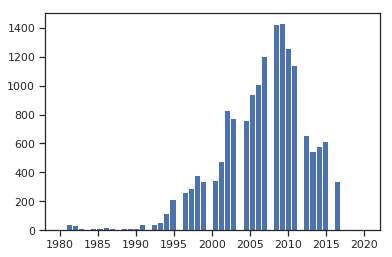

In [0]:
plt.hist(data['Year'], 50)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


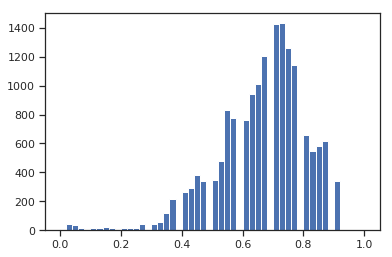

In [0]:
plt.hist(sc1_data, 50)
plt.show()

## 3.2. Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0) - [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [0]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Year']])

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


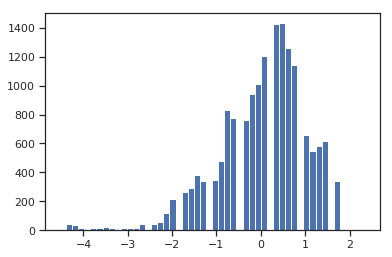

In [0]:
plt.hist(sc2_data, 50)
plt.show()

## 3.3. [Нормализация данных](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html)

In [0]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['Global_Sales']])

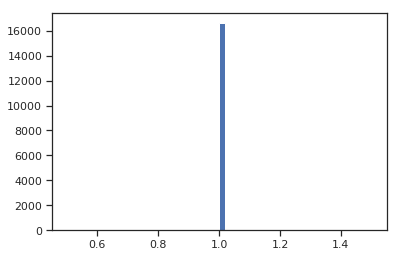

In [0]:
plt.hist(sc3_data, 50)
plt.show()

# Дополнительные источники
- [Руководство scikit-learn по предобработке данных](https://scikit-learn.org/stable/modules/preprocessing.html)
- [Kaggle Data Cleaning Challenge: Handling missing values (упражнения с пояснениями по обработке пропущенных значений и масштабированию признаков)](https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values)

- [Краткое руководство по категориальным признакам](https://towardsdatascience.com/encoding-categorical-features-21a2651a065c)
